# Laboratorul 3

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice as sound

## Exercițiul 1

Generați un semnal sinusoidal folosind funcția sinus (`np.sin`) cu o amplitudine, frecvență și fază aleasă de voi. Generați apoi un semnal folosind funcția cosinus (`np.cos`) astfel încât, pe orizontul de timp ales, acesta să fie identic cu semnalul sinus. Verificați afișându-le grafic în două subplot-uri diferite.

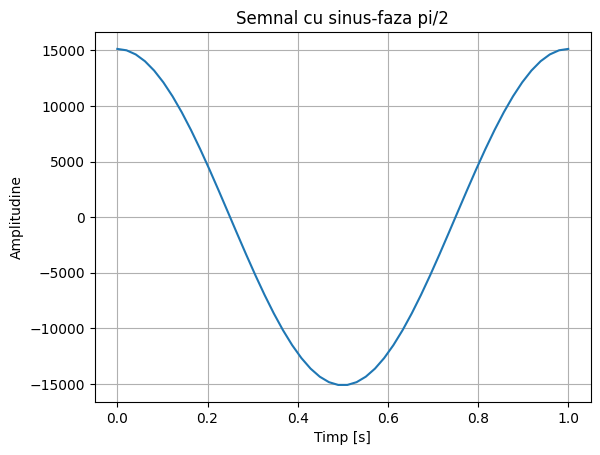

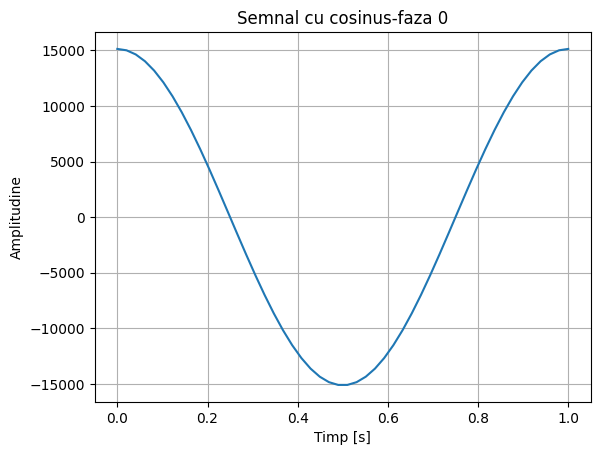

In [22]:
# rate = int(44100)
# scipy.io.wavfile.write('nume.wav', rate, signal)
# fs =44100
# sounddevice.play(x, fs)
# sounddevice.wait()

#Semanl cu sinus 
A=15129
f=1
faza1=0
faza2=np.pi/2
t=np.linspace(0,1)
x=A*np.sin(2*np.pi*f*t+faza2)

plt.plot(t,x)
plt.title('Semnal cu sinus-faza pi/2')
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid()
plt.show()

#Semnal cu cosinus
y=A*np.cos(2*np.pi*f*t+faza1)
plt.plot(t,y)
plt.title('Semnal cu cosinus-faza 0')
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid()
plt.show()



## Exercițiul 2

Generați un semnal sinusoidal de amplitudine egală cu 1 și cu o frecvență aleasă de voi. Încercați 4 valori diferite pentru fază. Afișați toate semnalele pe același grafic.

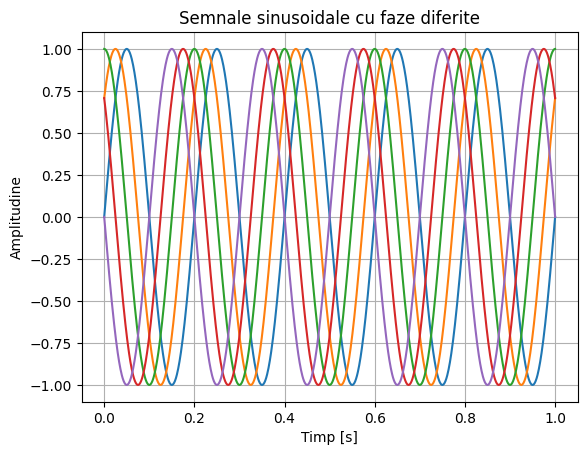

In [ ]:
A=1
frecventa=5
faza1=0
faza2=np.pi/4
faza3=np.pi/2
faza4=3*np.pi/4
faza5=np.pi

t=np.linspace(0,1,1000)
x0=A*np.sin(2*np.pi*frecventa*t+faza1)
x1=A*np.sin(2*np.pi*frecventa*t+faza2)
x2=A*np.sin(2*np.pi*frecventa*t+faza3)
x3=A*np.sin(2*np.pi*frecventa*t+faza4)
x4=A*np.sin(2*np.pi*frecventa*t+faza5)

plt.plot(t,x0,
         t,x1
         ,t,x2,
         t,x3,
         t,x4)
plt.title('Semnale sinusoidale cu faze diferite')
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid()


## Exercițiul 3

Generați două semnale cu forme de undă diferite (ex. unul sinusoidal, celălalt sawtooth) pe același orizont de timp și adunațile eșantioanele. Afișați grafic cele două semnale inițiale și suma lor, fiecare în câte un subplot.

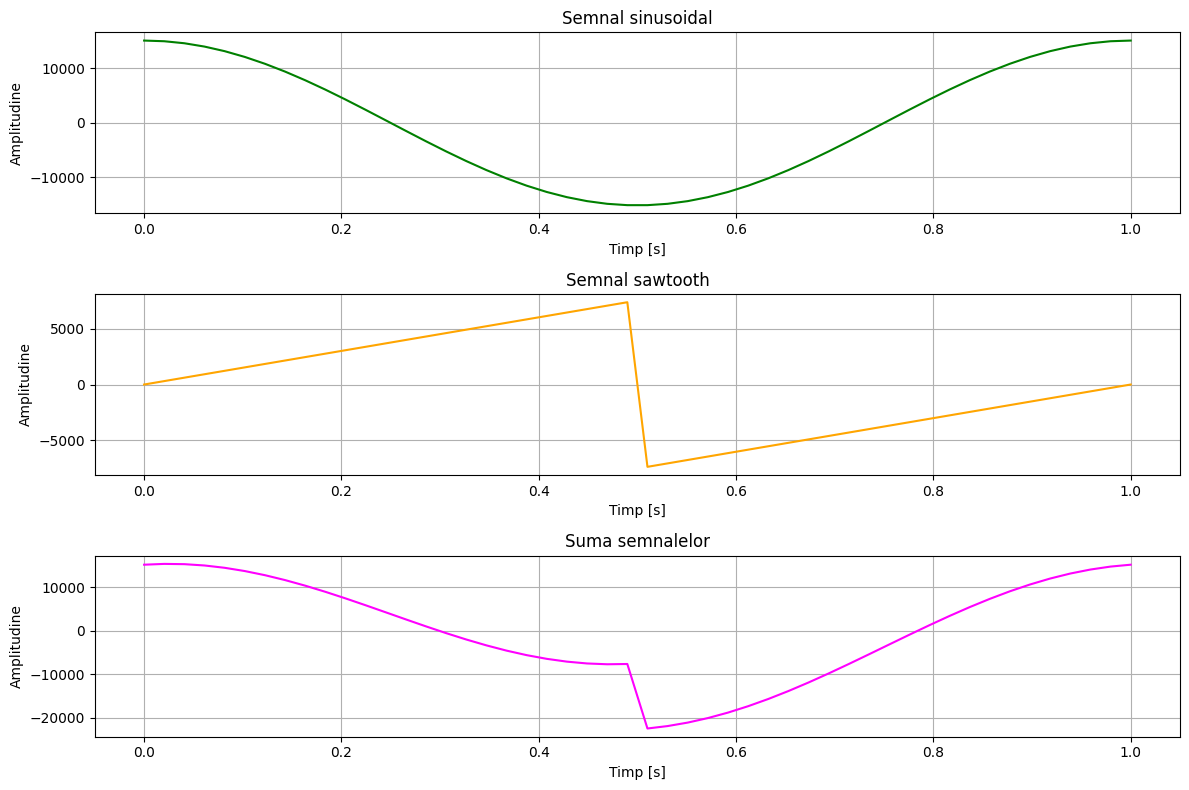

In [43]:
A1=15129
A2=15129/2
frecventa=1
faza1=0
faza2=np.pi/2

t=np.linspace(0,1)

x=A1*np.sin(2*np.pi*frecventa*t+faza2)
y=A2*2*(t*frecventa-np.floor(frecventa*t+0.5))

suma =x+y

plt.figure(figsize=(12, 8))


plt.subplot(3,1,1)
plt.plot(t,x,color='green')
plt.title('Semnal sinusoidal')
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid()
# plt.show()    q

plt.subplot(3,1,2)
plt.plot(t,y,color='orange')
plt.title('Semnal sawtooth')
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid()
# plt.show()

plt.subplot(3,1,3)
plt.plot(t,suma,color='magenta')
plt.title('Suma semnalelor')
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid()
# plt.show()

plt.tight_layout()
plt.show()

## Exercițiul 4

Generați două semnale cu aceeași formă de undă, dar de frecvențe diferite, și concatenați-le (puneți-le unul după celălalt în același vector). Redați audio rezultatul și notați ce observați.

**Observație:** Intervalul de frecvențe pe care îl poate percepe urechea umană este aproximativ 40&ndash;20000 Hz. Semnalele voastre ar trebui să aibă frecvențele fundamentale în acest interval dacă vreți să le puteți auzi. Frecvența de eșantionare ar trebui să fie 44100 Hz.

In [58]:
print(sound.query_devices())
print(sound.query_devices(4))


  0 HDA NVidia: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
  1 HDA NVidia: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
  2 HDA NVidia: HDMI 2 (hw:0,8), ALSA (0 in, 8 out)
  3 HDA NVidia: HDMI 3 (hw:0,9), ALSA (0 in, 8 out)
* 4 HD-Audio Generic: ALC287 Analog (hw:1,0), ALSA (2 in, 2 out)
  5 hdmi, ALSA (0 in, 8 out)
{'name': 'HD-Audio Generic: ALC287 Analog (hw:1,0)', 'index': 4, 'hostapi': 0, 'max_input_channels': 2, 'max_output_channels': 2, 'default_low_input_latency': 0.008707482993197279, 'default_low_output_latency': 0.008, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': 0.032, 'default_samplerate': 48000.0}


In [64]:
A=1
# frecventa greerilor
frecventa1=2000

# frecventa cu care un om normal vorbeste
frecventa2=150

# fs=44100
fs=48000
t=2

t1=np.linspace(0,t,int(fs*t))

x=A*np.sin(2*np.pi*frecventa1*t1)
y=A*np.sin(2*np.pi*frecventa2*t1)

concat = np.concatenate((x, y))
sound.default.device = 4
sound.play(concat, fs)
sound.wait()


## Exercițiul 5

Generați un semnal sinusoidal de frecvență 200 Hz, eșantionat la o frecvență de 500 Hz pe un interval de timp ales de voi (dar suficient de mic cât să puteți distinge oscilațiile). Decimați-l la 1/4 din frecvența inițială (păstrați doar al 4-lea fiecare element din vector).

1. Afișați grafic semnalul inițial și cel decimat și comentați diferențele.

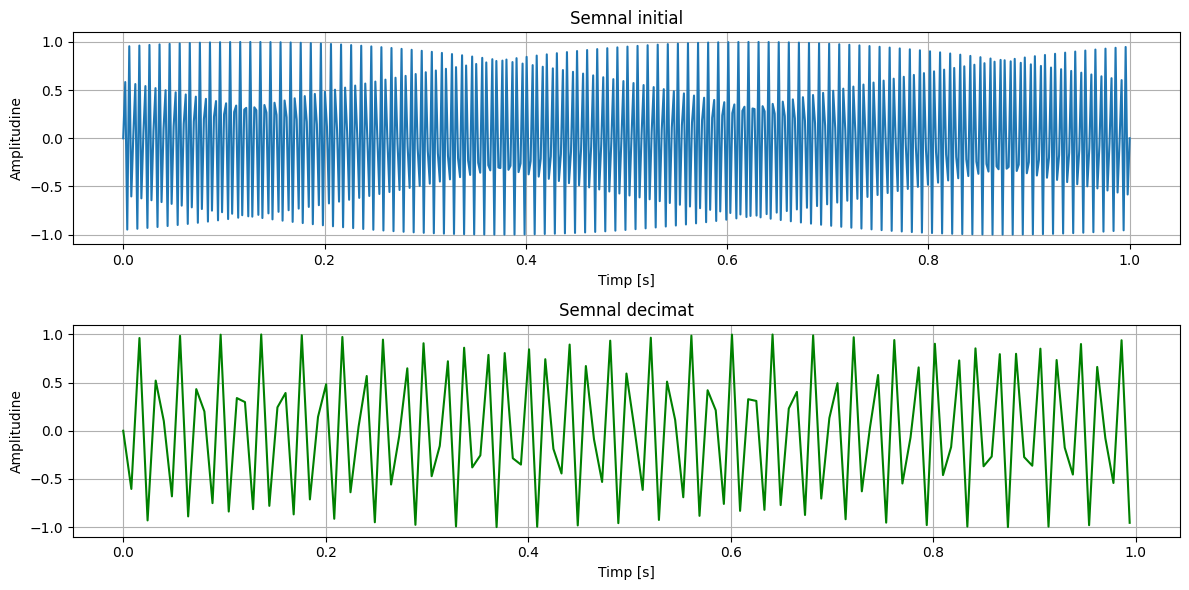

  0 HDA NVidia: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
  1 HDA NVidia: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
  2 HDA NVidia: HDMI 2 (hw:0,8), ALSA (0 in, 8 out)
  3 HDA NVidia: HDMI 3 (hw:0,9), ALSA (0 in, 8 out)
* 4 HD-Audio Generic: ALC287 Analog (hw:1,0), ALSA (2 in, 2 out)
  5 hdmi, ALSA (0 in, 8 out)
{'name': 'HD-Audio Generic: ALC287 Analog (hw:1,0)', 'index': 4, 'hostapi': 0, 'max_input_channels': 2, 'max_output_channels': 2, 'default_low_input_latency': 0.008707482993197279, 'default_low_output_latency': 0.008, 'default_high_input_latency': 0.034829931972789115, 'default_high_output_latency': 0.032, 'default_samplerate': 48000.0}


In [79]:
frecventa1=200
A=1
fs=500
t=1

t1=np.linspace(0,t,int(fs*t))
x=A*np.sin(2*np.pi*frecventa1*t1)
y=x[::4]
t2=t1[::4]
fs_decimatat=fs//4

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(t1,x)
plt.title('Semnal initial')
plt.xlabel('Timp [s]')  
plt.ylabel('Amplitudine')
plt.grid()
# plt.show()

plt.subplot(2,1,2)
plt.plot(t2,y,color='green')
plt.title('Semnal decimat')
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid()
plt.tight_layout()
plt.show()

print(sound.query_devices())
print(sound.query_devices(4))

2. Repetați decimarea (tot la 1/4 din frecvența inițială) pornind acum de la al doilea sau de la al treilea element din vector. Ce observați? Este decimarea invariantă în timp?

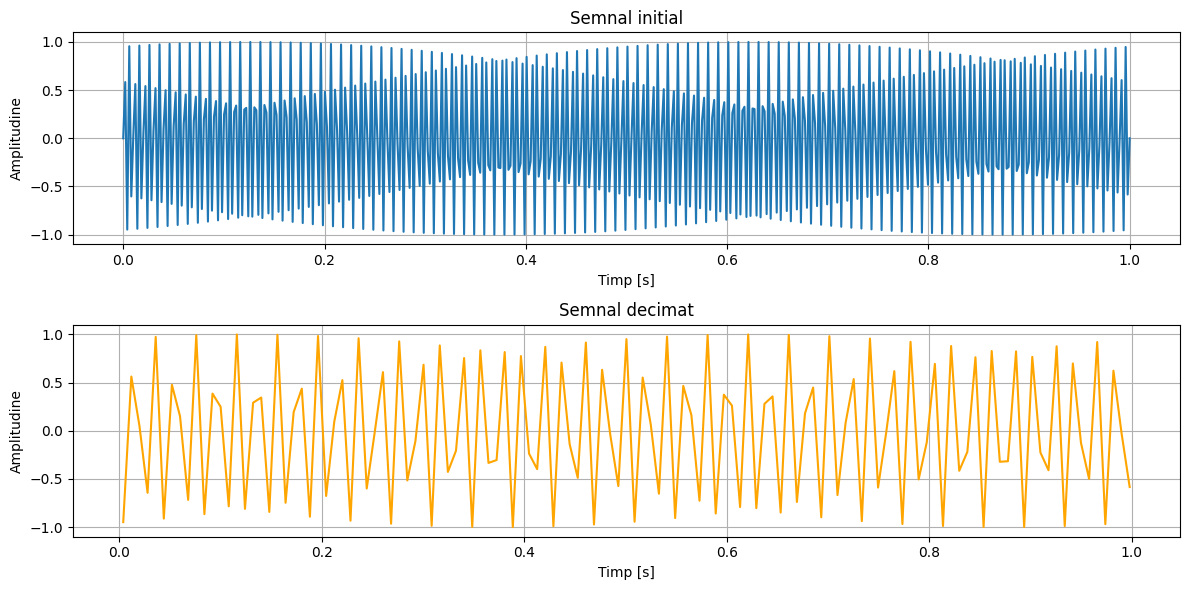

In [ ]:
frecventa1=200
A=1
fs=500
t=1

t1=np.linspace(0,t,int(fs*t))
x=A*np.sin(2*np.pi*frecventa1*t1)

y=x[2::4]
t2=t1[2::4]
fs_decimatat=fs//4

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(t1,x)
plt.title('Semnal initial')
plt.xlabel('Timp [s]')  
plt.ylabel('Amplitudine')
plt.grid()
# plt.show()

plt.subplot(2,1,2)
plt.plot(t2,y,color='orange')
plt.title('Semnal decimat')
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.grid()
plt.tight_layout()
plt.show()

#Ambele semnale sunt invariante in timp


## Exercițiul 6

În practică se operează des cu următoarea aproximare: pentru valori mici ale lui $\alpha$, $\sin(\alpha) \approx \alpha$. Verificați dacă această aproximare este bună, reprezentând grafic cele două curbe ($f (x) = x$
și $f (x) = \sin(x)$) pentru valori în intervalul $[-\pi/2, \pi/2]$.

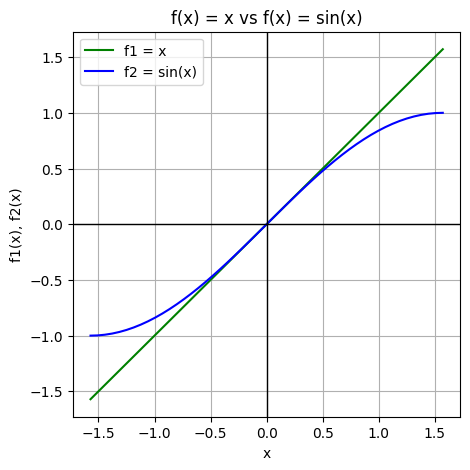

In [3]:
x=np.linspace(-np.pi/2,np.pi/2)
f1=x
f2=np.sin(x)

plt.figure(figsize=(5,5))

plt.plot(x,f1,label='f1 = x',color='green')
plt.plot(x,f2,label='f2 = sin(x)',color='blue')
plt.legend()
plt.title('f(x) = x vs f(x) = sin(x)')
plt.xlabel('x')
plt.ylabel('f1(x), f2(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid()
plt.show()